## Import package

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

## Import dataset

In [2]:
fash_train_df = pd.read_csv('fashion-mnist_train.csv', sep=',')

In [3]:
fash_test_df = pd.read_csv('fashion-mnist_test.csv', sep=',')

## Visualization

In [4]:
fash_train_df.head(2)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
fash_train_df.shape

(60000, 785)

In [6]:
fash_test_df.shape

(10000, 785)

In [7]:
training = np.array(fash_train_df, dtype='float32') # create matrix for training

In [8]:
testing = np.array(fash_test_df, dtype='float32') # create matrix for test

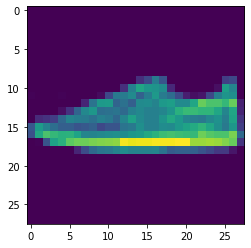

In [9]:
# Visualizing the flatten image
i = np.random.randint(1,60000)
plt.imshow(training[i,1:].reshape(28,28));
#press CTRL + Return to continuously check the item

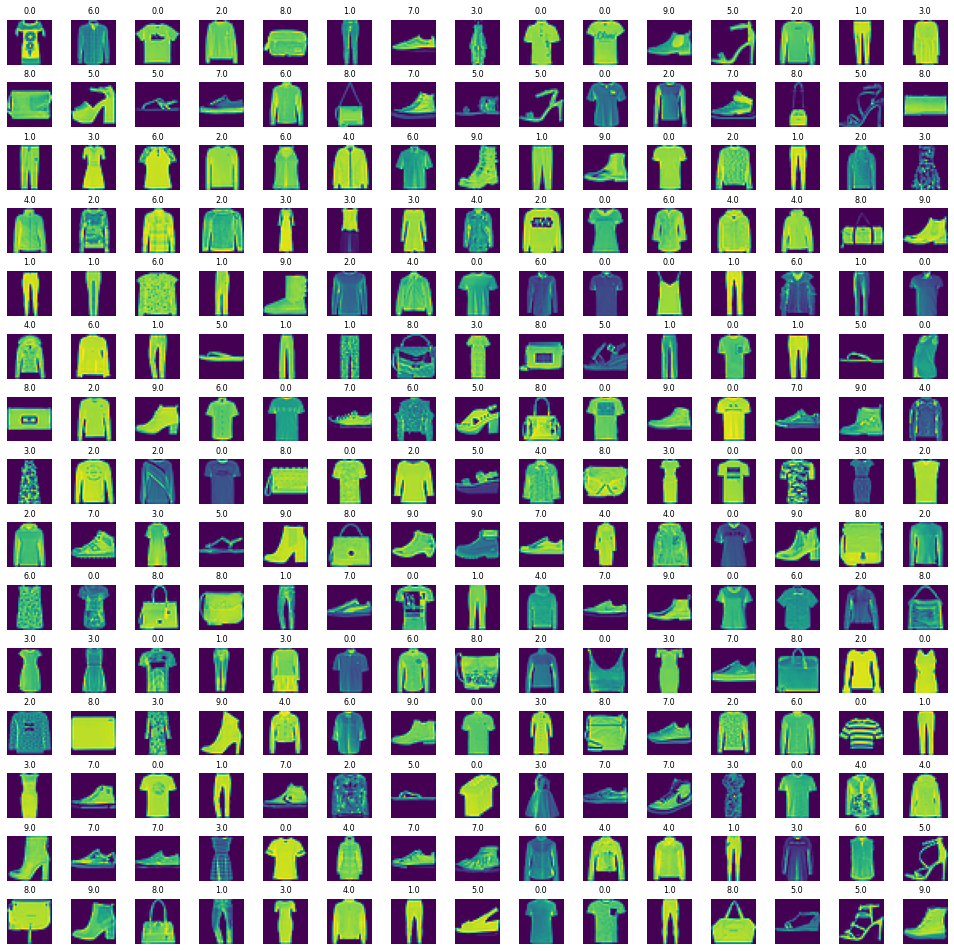

In [10]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(training) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( training[index,1:].reshape((28,28)) )
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4) 

## Training the model

### Seperating features and label

In [11]:
X_train = training[:,1:]/255
y_train = training[:,0]

In [12]:
X_test = testing[:,1:]/255
y_test = testing[:,0]

### Create the validation set
Using 20% of the train set to make the model more generalize.

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)

Reshaping train,validation and test set into 28 x 28 from to feed into neural network.

In [14]:
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

In [15]:
X_train.shape

(48000, 28, 28, 1)

In [24]:
import tensorflow as tf

In [25]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[28, 28, 1]))

cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

#cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

cnn.add(tf.keras.layers.Dense(units=10, activation='softmax'))

cnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [26]:
num_epoch = 25

history = cnn.fit(X_train,
                        y_train,
                        batch_size = 512,
                        epochs = num_epoch,
                        verbose = 1,
                        validation_data = (X_validate, y_validate))

Epoch 1/25
94/94 [==============================] - 9s 93ms/step - loss: 0.7753 - accuracy: 0.7295 - val_loss: 0.5035 - val_accuracy: 0.8197
Epoch 2/25
94/94 [==============================] - 9s 92ms/step - loss: 0.4424 - accuracy: 0.8416 - val_loss: 0.4081 - val_accuracy: 0.8553
Epoch 3/25
94/94 [==============================] - 9s 92ms/step - loss: 0.3774 - accuracy: 0.8661 - val_loss: 0.3538 - val_accuracy: 0.8750
Epoch 4/25
94/94 [==============================] - 9s 92ms/step - loss: 0.3492 - accuracy: 0.8752 - val_loss: 0.3336 - val_accuracy: 0.8837
Epoch 5/25
94/94 [==============================] - 9s 92ms/step - loss: 0.3201 - accuracy: 0.8865 - val_loss: 0.3257 - val_accuracy: 0.8848
Epoch 6/25
94/94 [==============================] - 9s 93ms/step - loss: 0.3020 - accuracy: 0.8931 - val_loss: 0.3164 - val_accuracy: 0.8854
Epoch 7/25
94/94 [==============================] - 9s 92ms/step - loss: 0.2854 - accuracy: 0.8989 - val_loss: 0.3050 - val_accuracy: 0.8903
Epoch 8/25
94

## Evaluate the model

In [27]:
acc = cnn.evaluate(X_test,y_test)
print('Test accuracy: {:.3f}'.format(acc[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.2417 - accuracy: 0.9125
Test accuracy: 0.913


In [28]:
y_pred = cnn.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


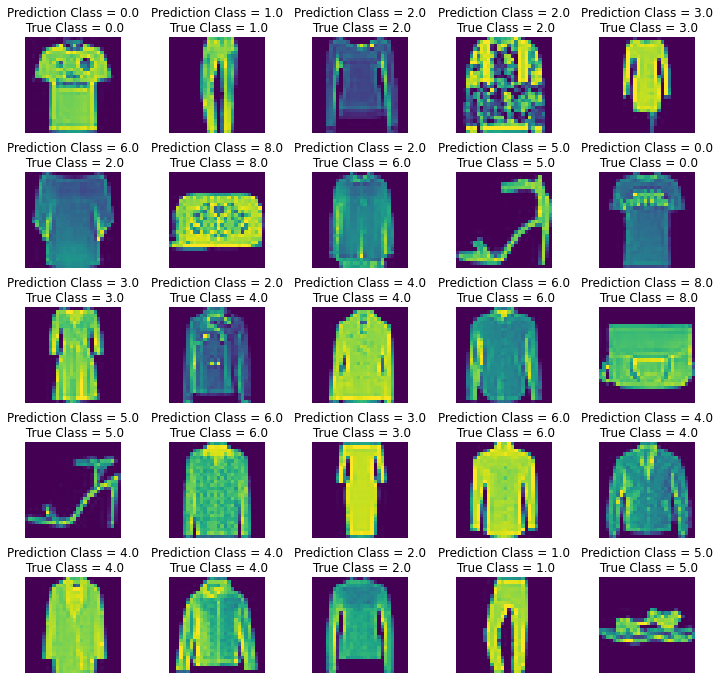

In [29]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(y_pred[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

In [30]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)

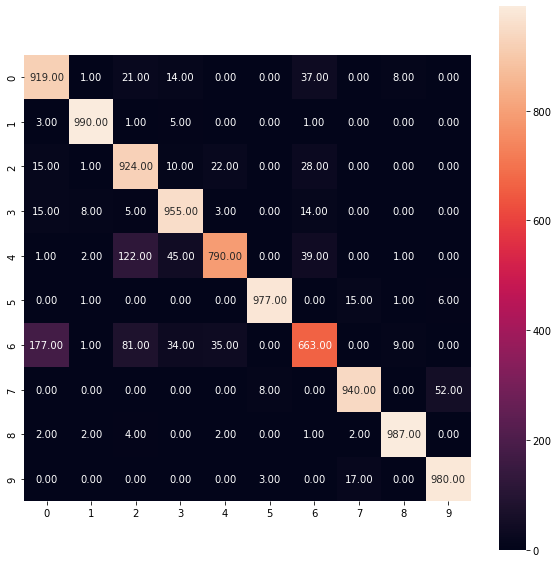

In [31]:
fig, axes = plt.subplots(figsize=(10,10))
sb.heatmap(cm, square=True, annot=True, fmt='.2f');

In [32]:
num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, y_pred, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.81      0.92      0.86      1000
     Class 1       0.98      0.99      0.99      1000
     Class 2       0.80      0.92      0.86      1000
     Class 3       0.90      0.95      0.93      1000
     Class 4       0.93      0.79      0.85      1000
     Class 5       0.99      0.98      0.98      1000
     Class 6       0.85      0.66      0.74      1000
     Class 7       0.97      0.94      0.95      1000
     Class 8       0.98      0.99      0.98      1000
     Class 9       0.94      0.98      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



## Improving the model

In [49]:
cnn2 = tf.keras.models.Sequential()

cnn2.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[28, 28, 1]))

cnn2.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

# reducing the layer and add dropout
#cnn2.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))
#cnn2.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

cnn2.add(tf.keras.layers.Dropout(0.25))

cnn2.add(tf.keras.layers.Flatten())

cnn2.add(tf.keras.layers.Dense(units=128, activation='relu'))

cnn2.add(tf.keras.layers.Dense(units=10, activation='softmax'))

cnn2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [50]:
num_epochs = 50

history = cnn2.fit(X_train,
                        y_train,
                        batch_size = 512,
                        epochs = num_epochs,
                        verbose = 1,
                        validation_data = (X_validate, y_validate))

Epoch 1/50
94/94 [==============================] - 8s 80ms/step - loss: 0.6236 - accuracy: 0.7861 - val_loss: 0.4286 - val_accuracy: 0.8457
Epoch 2/50
94/94 [==============================] - 8s 80ms/step - loss: 0.3888 - accuracy: 0.8638 - val_loss: 0.3609 - val_accuracy: 0.8741
Epoch 3/50
94/94 [==============================] - 8s 80ms/step - loss: 0.3429 - accuracy: 0.8797 - val_loss: 0.3285 - val_accuracy: 0.8851
Epoch 4/50
94/94 [==============================] - 7s 79ms/step - loss: 0.3118 - accuracy: 0.8893 - val_loss: 0.3022 - val_accuracy: 0.8928
Epoch 5/50
94/94 [==============================] - 8s 80ms/step - loss: 0.2926 - accuracy: 0.8959 - val_loss: 0.2898 - val_accuracy: 0.8968
Epoch 6/50
94/94 [==============================] - 7s 80ms/step - loss: 0.2763 - accuracy: 0.9019 - val_loss: 0.2826 - val_accuracy: 0.8989
Epoch 7/50
94/94 [==============================] - 7s 80ms/step - loss: 0.2609 - accuracy: 0.9065 - val_loss: 0.2807 - val_accuracy: 0.9002
Epoch 8/50
94

In [51]:
acc = cnn2.evaluate(X_test,y_test)
print('Test accuracy: {:.3f}'.format(acc[1]))

313/313 [==============================] - 0s 1ms/step - loss: 0.2695 - accuracy: 0.9229
Test accuracy: 0.923


## Conclusion

* Advanced techniques using more rich dataset can be used to analyses the color, texture and style besides the categorical classification.
---
* (32, 3, 2) kernel w/o dropout:
    - Train accuracy: 94.42 %
    - Test accuracy: 91.30 %
---    
* (32, 3, 2) kernel with dropout:
    - Train accuracy: 97.78 %
    - Test accuracy: 92.30 %